# Part A

**PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

1. Import and analyse the data set. [5 Marks]

In [1]:
# Hint: - Use `imdb.load_data()` method
# - Get train and test set
# - Take 10000 most frequent words

from keras.datasets import imdb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
x_test.shape

(25000,)

In [5]:
# 2. Perform relevant sequence adding on the data. [5 Marks]
from keras.preprocessing import sequence

max_review_length = 20
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)



In [6]:
#3. Perform following data analysis: [5 Marks]
#   Print shape of features and labels
#   Print value of any one feature and it's label
print("Shape of features:",x_train.shape)
print("Shape of labels:",y_train.shape)
print("Value of feature:",x_train[1])
print("Value of label:",y_train[1])


Shape of features: (25000, 20)
Shape of labels: (25000,)
Value of feature: [  23    4 1690   15   16    4 1355    5   28    6   52  154  462   33
   89   78  285   16  145   95]
Value of label: 0


In [7]:
print(x_train[1][1].shape)

()


In [8]:
# 4. Decode the feature value to get original sentence [5 Marks]
word_index = imdb.get_word_index()
def Decode_sent(index = 24):
    
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in x_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review

1654784/1641221 [==============================] - 0s 0us/step


In [9]:
decoded_review = Decode_sent(1)

on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0


In [10]:
# 5. Design, train, tune and test a sequential model. [5 Marks]
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            320032    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,333
Trainable params: 373,333
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.fit(x_train, y_train, epochs=50, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
391/391 [==============================] - 15s 10ms/step - loss: 0.5409 - accuracy: 0.7167
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4111 - accuracy: 0.8114
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3561 - accuracy: 0.8415
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3067 - accuracy: 0.8695
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2556 - accuracy: 0.8930
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2097 - accuracy: 0.9135
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1638 - accuracy: 0.9357
Epoch 8/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1269 - accuracy: 0.9520
Epoch 9/50
391/391 [==============================] - 2s 6ms/step - loss: 0.0984 - accuracy: 0.9634
Epoch 10/50
391/391 [==============================] - 2s 6ms/step - loss: 0.0792 - accuracy: 0.9

In [12]:
# 6. Use the designed model to print the prediction on any one sample. [5 Marks]
decoded_review = Decode_sent(65)
#twt = sequence.pad_sequences(twt, maxlen=20, dtype='int32', value=0)

sentiment = model.predict(x_test)[65] #,batch_size=1,verbose = 2)

if(sentiment == 0):
    print("negative prediction")
elif (sentiment == 1):
    print("positive prediction")

true_value=y_test[65]

if(true_value == 0):
    print("negative true value")
elif (true_value == 1):
    print("positive true value")


for 25 cents it's no masterpiece but i'd certainly take it over most of the director's recent thrillers any day
1
positive prediction
positive true value


# Part B

**PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 1. Read and explore the data [3 Marks]
project_path = '/content/drive/MyDrive/NLP_projects/'
file_path = project_path + "News-Headlines-Dataset-For-Sarcasm-Detection-master.zip"

from zipfile import ZipFile

with ZipFile(file_path, 'r') as z:
  z.extractall()


df = pd.read_json("/content/News-Headlines-Dataset-For-Sarcasm-Detection-master/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


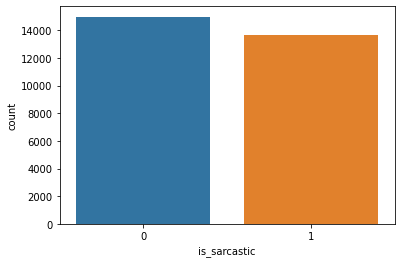

In [16]:
sns.countplot(data=df, x="is_sarcastic")

There are slightly less sarcastic headlines than non-sarcastic ones.

In [17]:
News_site = []
for row in df['article_link']:
    if 'theonion.com' in row : News_site.append('The Onion')
    elif 'huffingtonpost.com' in row : News_site.append('Huffington Post')
    else: News_site.append('Something else')

df['Web-site'] = News_site

In [18]:
df.head()

,is_sarcastic,headline,article_link,Web-site
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,The Onion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,Huffington Post
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,Huffington Post
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,The Onion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,The Onion


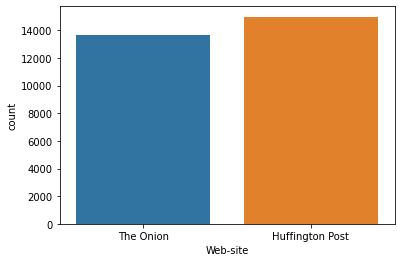

In [19]:
sns.countplot(data=df, x="Web-site")

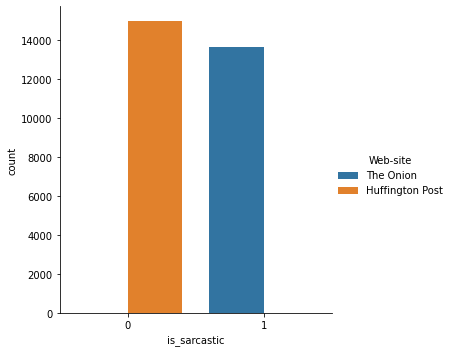

In [20]:
sns.catplot(data=df, x="is_sarcastic", hue="Web-site", kind="count")

The Onion has sarcastic headlines whereas Huffinton Post has non-sarcastic headlines

In [21]:
# 2. Retain relevant columns [3 Marks]
df.drop('article_link', axis = 1, inplace = True)
df.head()

,is_sarcastic,headline,Web-site
0,1,thirtysomething scientists unveil doomsday clo...,The Onion
1,0,dem rep. totally nails why congress is falling...,Huffington Post
2,0,eat your veggies: 9 deliciously different recipes,Huffington Post
3,1,inclement weather prevents liar from getting t...,The Onion
4,1,mother comes pretty close to using word 'strea...,The Onion


In [22]:
# 3. Get length of each sentence [3 Marks]
df['sent_length']= df['headline'].str.split().map(lambda x: len(x))
df.head()

,is_sarcastic,headline,Web-site,sent_length
0,1,thirtysomething scientists unveil doomsday clo...,The Onion,8
1,0,dem rep. totally nails why congress is falling...,Huffington Post,13
2,0,eat your veggies: 9 deliciously different recipes,Huffington Post,7
3,1,inclement weather prevents liar from getting t...,The Onion,8
4,1,mother comes pretty close to using word 'strea...,The Onion,9


In [23]:
# 4. Define parameters [3 Marks]
# max_features: Number of words to take from tokenizer
# maxlen: Maximum length of each sentence
# embedding_size: Size of embedding vector

max_features = 10000
maxlen = 25
embedding_size = 200

In [24]:
# 5. Get indices for words [3 Marks]
import tensorflow as tf
top_k = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(df['headline'])

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(df['headline'])

In [25]:
# 6. Create features and labels [3 Marks]
X = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=maxlen)
Y = df["is_sarcastic"].values

In [26]:
tokenizer.word_index

{'<unk>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'after': 19,
 'you': 20,
 'this': 21,
 'out': 22,
 'up': 23,
 'be': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'how': 28,
 'not': 29,
 'he': 30,
 'his': 31,
 'are': 32,
 'your': 33,
 'just': 34,
 'what': 35,
 'all': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'report': 40,
 'into': 41,
 'more': 42,
 'one': 43,
 'have': 44,
 'year': 45,
 'over': 46,
 'why': 47,
 'day': 48,
 'u': 49,
 'area': 50,
 'woman': 51,
 'can': 52,
 's': 53,
 'says': 54,
 'donald': 55,
 'time': 56,
 'first': 57,
 'like': 58,
 'no': 59,
 'her': 60,
 'get': 61,
 'off': 62,
 'old': 63,
 "trump's": 64,
 'life': 65,
 'now': 66,
 'people': 67,
 "'": 68,
 'an': 69,
 'house': 70,
 'still': 71,
 'obama': 72,
 'white': 73,
 'back': 74,
 'make': 75,
 'was': 76,
 'than': 77,
 'women': 78,
 'if': 79,
 'down': 80,
 'when': 81,
 '

In [27]:
# 7. Get vocabulary size [3 Marks]
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

Vocabulary size: 30888


In [28]:
# 8. Create a weight matrix using GloVe embeddings [3 Marks]
glove_file_path = '/content/drive/MyDrive/NLP_projects/glove.6B.zip'

with ZipFile(glove_file_path, 'r') as z:
  z.extractall()

In [29]:
from numpy import asarray

embeddings_index = dict()
f = open("glove.6B.200d.txt", mode='r', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], "float32")
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [30]:
embedding_matrix = np.zeros((vocab_size, 200))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [31]:
# 9. Define and compile a Bidirectional LSTM model. [3 Marks]
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU

#Defining Neural Network
model_2 = Sequential()
#Non-trainable embeddidng layer
model_2.add(Embedding(vocab_size, output_dim=200, weights=[embedding_matrix], input_length=maxlen, trainable=True))
#LSTM 
model_2.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model_2.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02), loss='binary_crossentropy', metrics=['acc'])

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.3 , random_state = 0) 

In [33]:
# 10. Fit the model and check the validation accuracy [3 Marks]
history_2 = model_2.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 5)

Epoch 1/5
157/157 [==============================] - 90s 489ms/step - loss: 0.4364 - acc: 0.8001 - val_loss: 0.3458 - val_acc: 0.8553
Epoch 2/5
157/157 [==============================] - 71s 454ms/step - loss: 0.1995 - acc: 0.9202 - val_loss: 0.3516 - val_acc: 0.8597
Epoch 3/5
157/157 [==============================] - 69s 442ms/step - loss: 0.1217 - acc: 0.9534 - val_loss: 0.4208 - val_acc: 0.8537
Epoch 4/5
157/157 [==============================] - 69s 439ms/step - loss: 0.0848 - acc: 0.9682 - val_loss: 0.4737 - val_acc: 0.8499
Epoch 5/5
157/157 [==============================] - 69s 440ms/step - loss: 0.0729 - acc: 0.9755 - val_loss: 0.5163 - val_acc: 0.8495


In [34]:

print("Accuracy on Training Data is: " , model_2.evaluate(x_train,y_train)[1]*100)
print("Accuracy on Testing Data is: " , model_2.evaluate(x_test,y_test)[1]*100)

627/627 [==============================] - 19s 30ms/step - loss: 0.0365 - acc: 0.9895
Accuracy on Training Data is:  98.94673824310303
269/269 [==============================] - 8s 29ms/step - loss: 0.5163 - acc: 0.8495
Accuracy on Testing Data is:  84.95224714279175
